Author: Naoki Atkins

In this project, we first explored our data. We used a scatter matrix and a correlation matrix to determine the feature that describes most of the variability in MedHouseVal. We found that MedInc has a correlation value of positive .68 in relation to MedHouseVal. This model based on MedInc scored better than the model that we randomly picked (AveBedrms). Afterwards, we created a model based on all input features and also the polynomial features. This proved to be a better model. To create a model that penalized large values for the coefficients, we used L2 regularization. Again, this intermediate model performed better than all of the previous models. 

In [1]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Ridge
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
%matplotlib inline

***Question 1***

In [2]:
data = sklearn.datasets.fetch_california_housing(as_frame = True)

In [3]:
data.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


***Question 2***

In [4]:
y = data.frame['MedHouseVal']

In [5]:
X = data.frame.iloc[:,0:8]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=(2021-3-25))

***Question 3***

In [7]:
reg = LinearRegression().fit(X_train['AveBedrms'][:,None], y_train)

In [8]:
pred_train = reg.predict(X_train['AveBedrms'][:,None])

In [9]:
MSE_train = mean_squared_error(pred_train, y_train)
MSE_train

1.3278477256171917

In [10]:
pred_test = reg.predict(X_test['AveBedrms'][:,None])

In [11]:
MSE_test = mean_squared_error(pred_test, y_test)
MSE_test

1.3323730132311569

***Question 4***

In [12]:
reg.score(X_train['AveBedrms'][:,None], y_train)

0.0028776656256584987

In [13]:
reg.score(X_test['AveBedrms'][:,None], y_test)

-0.0010086368172135263

Given the R2 scores, how well did our model do?

Neither of our models are very good, sense the training model is only .2% and should be closer to 1, while the test score is -.1% which is also a very poor score

***Question 5***

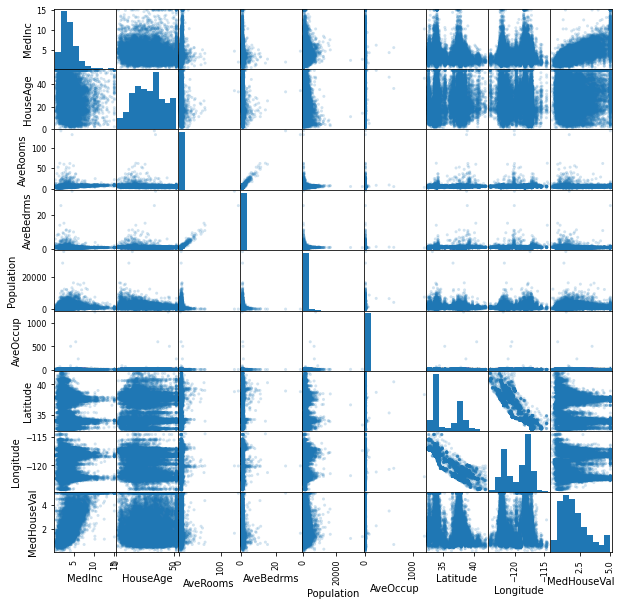

In [14]:
pd.plotting.scatter_matrix(data.frame, alpha=0.2, figsize = (10,10));

***Question 6***

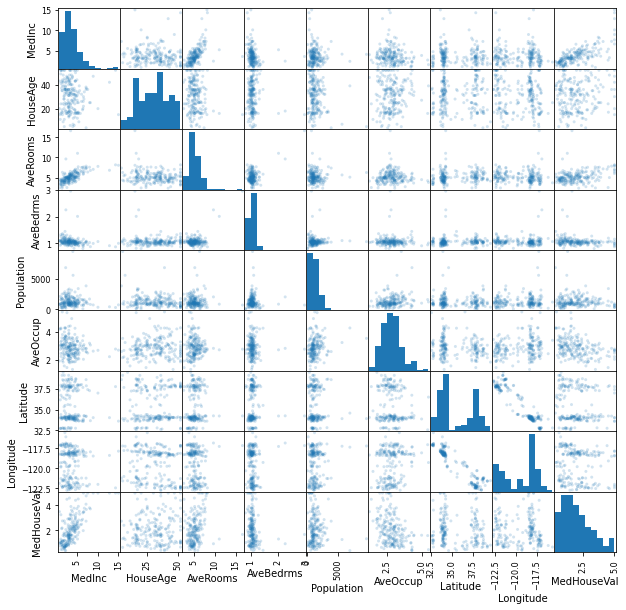

In [15]:
pd.plotting.scatter_matrix(data.frame.sample(frac = 0.01), alpha=0.2, figsize = (10,10));

How does the AveBedrms feature appear to affect MedHouseVal?
 
The average bedrooms appears to not affect the median house value, as the data suggest that the majority of housing only has 1 bedroom and the value varries greatly with just the one bedroom.

How does this explain the value of R2 you found in experiment (4)?

Since the majority of the housing only has one bedroom this would explain why the test set and training set did not preform well as the median housing value varies greatly with just one bedroom

***Question 7***

Which features seem to have the strongest linear relationship with MedHouseVal?

Median Income seems to have the strongest linear relationship with Median house value, as people make more money they tend to have a higher value property

***Question 8***

What relationship do you see between MedHouseVal and the Latitude and Longitude features?

Based on a map and using the data collected the value of housing is highest near the coast in areas near San fransico and the 
area between / near Los Angeles. The area inland and further North of California have decreased housing values.


***Question 9***

In [16]:
df = pd.DataFrame(data.frame)
df.corr(method = 'pearson')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Based on the correlation matrix, which feature is the strongest predictor of MedHouseVal? Does this match your answer in 
experiment (7)?

Median Income seems to have the strongest predictor of median house value as it is 68.9% which matches what we thought 
would occur in question 7

***Question 10***

In [17]:
reg = LinearRegression().fit(X_train['MedInc'][:,None], y_train)
reg.score(X_train['MedInc'][:,None], y_train)

0.468045955604915

In [18]:
reg.score(X_test['MedInc'][:,None], y_test)

0.49497685569639605

How well does this model score?

These scores fit better, the training score is at 46.8% while the test score is at 49.5%. Much better compared to the .2% and -.1% we were getting previously.

***Question 11***

In [19]:
reg = LinearRegression().fit(X_train, y_train)
pred_train = reg.predict(X_train)
MSE_train = mean_squared_error(pred_train, y_train)
print(MSE_train)

pred_test = reg.predict(X_test)
MSE_train = mean_squared_error(pred_test, y_test)
print(MSE_train)

0.5296444457890024
0.5047767239631318


How do the training and test MSEs for this model compare to that experiment?

Both the training and test MSE's for this model fit much better when compared to the experiment in question 4.

***Question 12***

In [20]:
poly = PolynomialFeatures(2)
poly_x_train = poly.fit_transform(X_train)
reg.fit(poly_x_train,y_train)
y_pred = reg.predict(poly_x_train)
mse = mean_squared_error(y_train, y_pred)
print (mse)

poly_x_test = poly.fit_transform(X_test)
y_pred = reg.predict(poly_x_test)
mse = mean_squared_error(y_test, y_pred)
print (mse)


0.42433222517444946
0.6463802847593988


No, adding polynomial terms does not lead to overfitting

***Question 13***

In [21]:
ridge = Ridge(alpha = 1, normalize = True)
ridge.fit(poly_x_train, y_train)
y_pred = ridge.predict(poly_x_train)
mse = mean_squared_error(y_train, y_pred)
print (mse)

y_pred = ridge.predict(poly_x_test)
mse = mean_squared_error(y_test, y_pred)
print (mse)


0.6457457247916449
0.6190711914117147


Yes this model performs better than the previous model, as the values are closer to 1